In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# **Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
# Train Test Split
from sklearn.model_selection import train_test_split
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

# **Understanding the Data**

In [3]:
#loading data
heartdata = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
#copying data
df=heartdata.copy()
#showing data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [4]:
print('Number of rows:',df.shape[0], 'Number of columns: ',df.shape[1])

Number of rows: 303 Number of columns:  14


In [5]:
heartdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
heartdata.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
print(heartdata.isnull().values.any(),":There is no null value")

False :There is no null value


# **Separating The Variables Categorical and Continuous**

In [8]:
cat_data = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_data = ["age","trtbps","chol","thalachh","oldpeak"]
target_data = ["output"]
print("The categorial variable: ", cat_data)
print("The continuous variable: ", con_data)
print("The target variable:  ", target_data)

The categorial variable:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous variable:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable:   ['output']


In [9]:
df[cat_data].describe().T

,count,mean,std,min,25%,50%,75%,max
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
caa,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
slp,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
thall,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


In [10]:
df[con_data].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# **EDA**

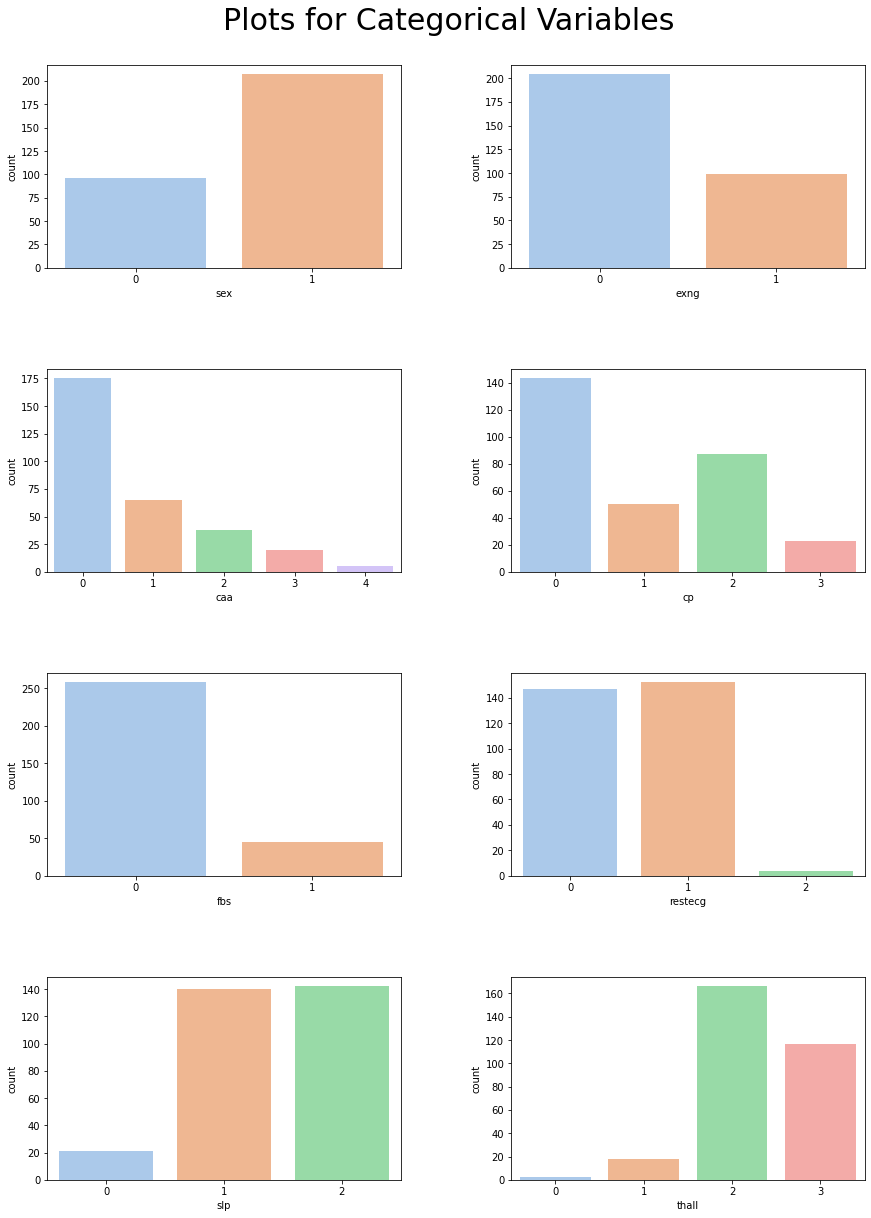

In [11]:
f,axes=plt.subplots(nrows=4, ncols=2, figsize=(14,18))
f.tight_layout(pad=8) 
f.suptitle('Plots for Categorical Variables', fontsize=30)

cols=df[cat_data].columns 

x_axes=0
y_axes=0

for col in cols:
  sns.countplot(data=df, x=col, ax=axes[x_axes,y_axes], palette='pastel')

  if y_axes == 1:  
    y_axes=0
    x_axes+=1
  else:
    y_axes+=1


plt.show()

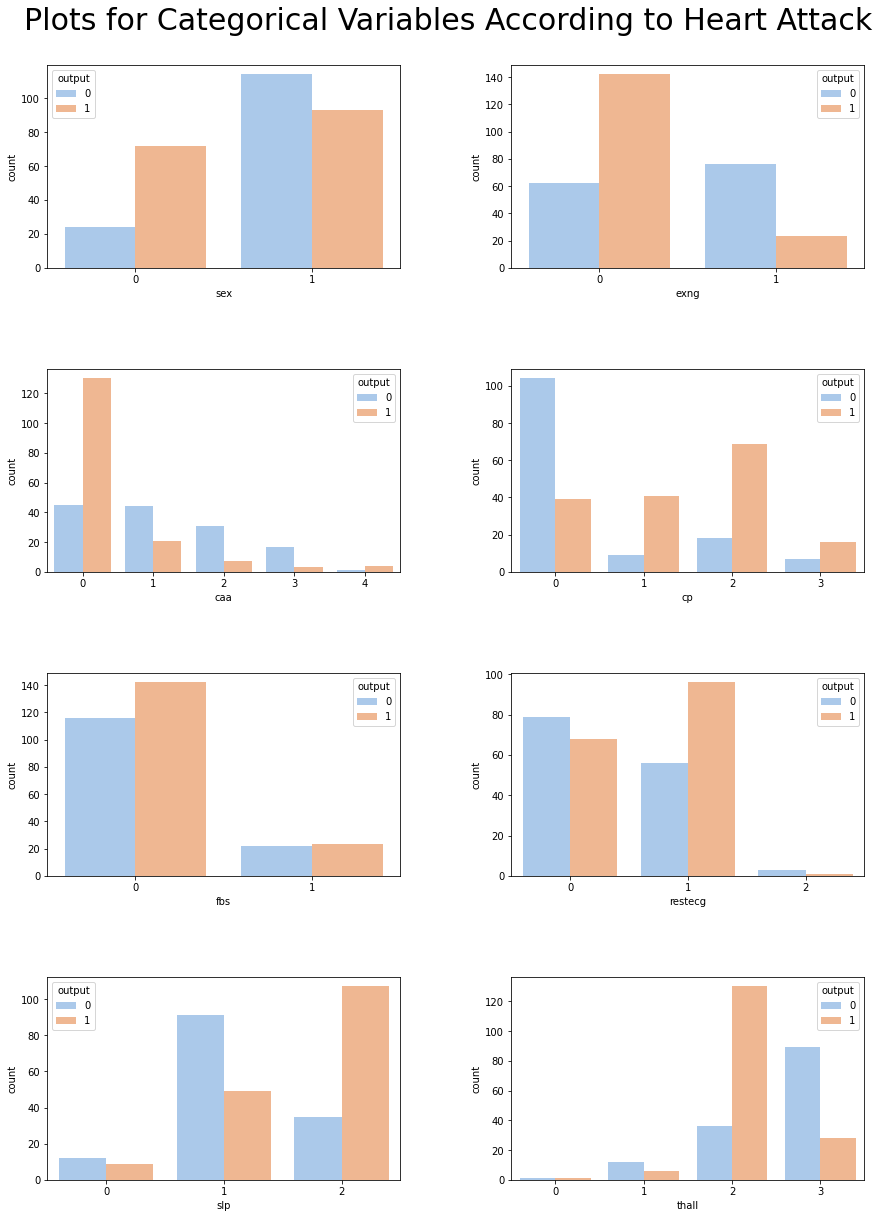

In [12]:
f,axes=plt.subplots(nrows=4, ncols=2, figsize=(14,18))
f.tight_layout(pad=8) 
f.suptitle('Plots for Categorical Variables According to Heart Attack', fontsize=30)

cols=df[cat_data].columns 

x_axes=0
y_axes=0

for col in cols:
  sns.countplot(data=df, x=col, hue = "output", ax=axes[x_axes,y_axes], palette='pastel')

  if y_axes == 1:  
    y_axes=0
    x_axes+=1
  else:
    y_axes+=1


plt.show()

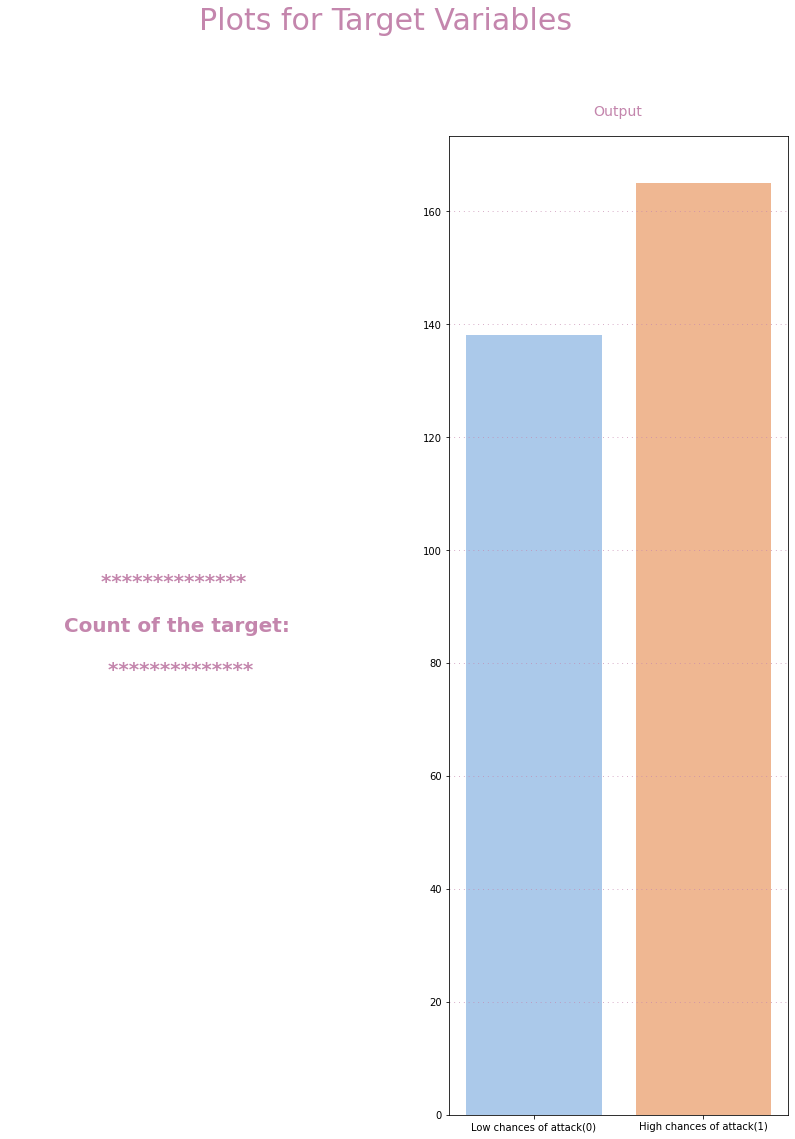

In [13]:
f=plt.figure(figsize=(14,18))
gs = f.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = f.add_subplot(gs[0,0])
ax1 = f.add_subplot(gs[0,1])

f.suptitle('Plots for Target Variables', fontsize=30, color="#c486ad")
ax0.text(0.5,0.5,"************** \n \n Count of the target: \n \n **************", horizontalalignment = 'center',verticalalignment = 'center',fontsize = 20,fontweight='bold',color="#c486ad")
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax0.set_facecolor("#ffffff") 

ax1.text(0.35,177,"Output",fontsize=14, color="#c486ad")
ax1.grid(color='#c486ad', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = "pastel")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

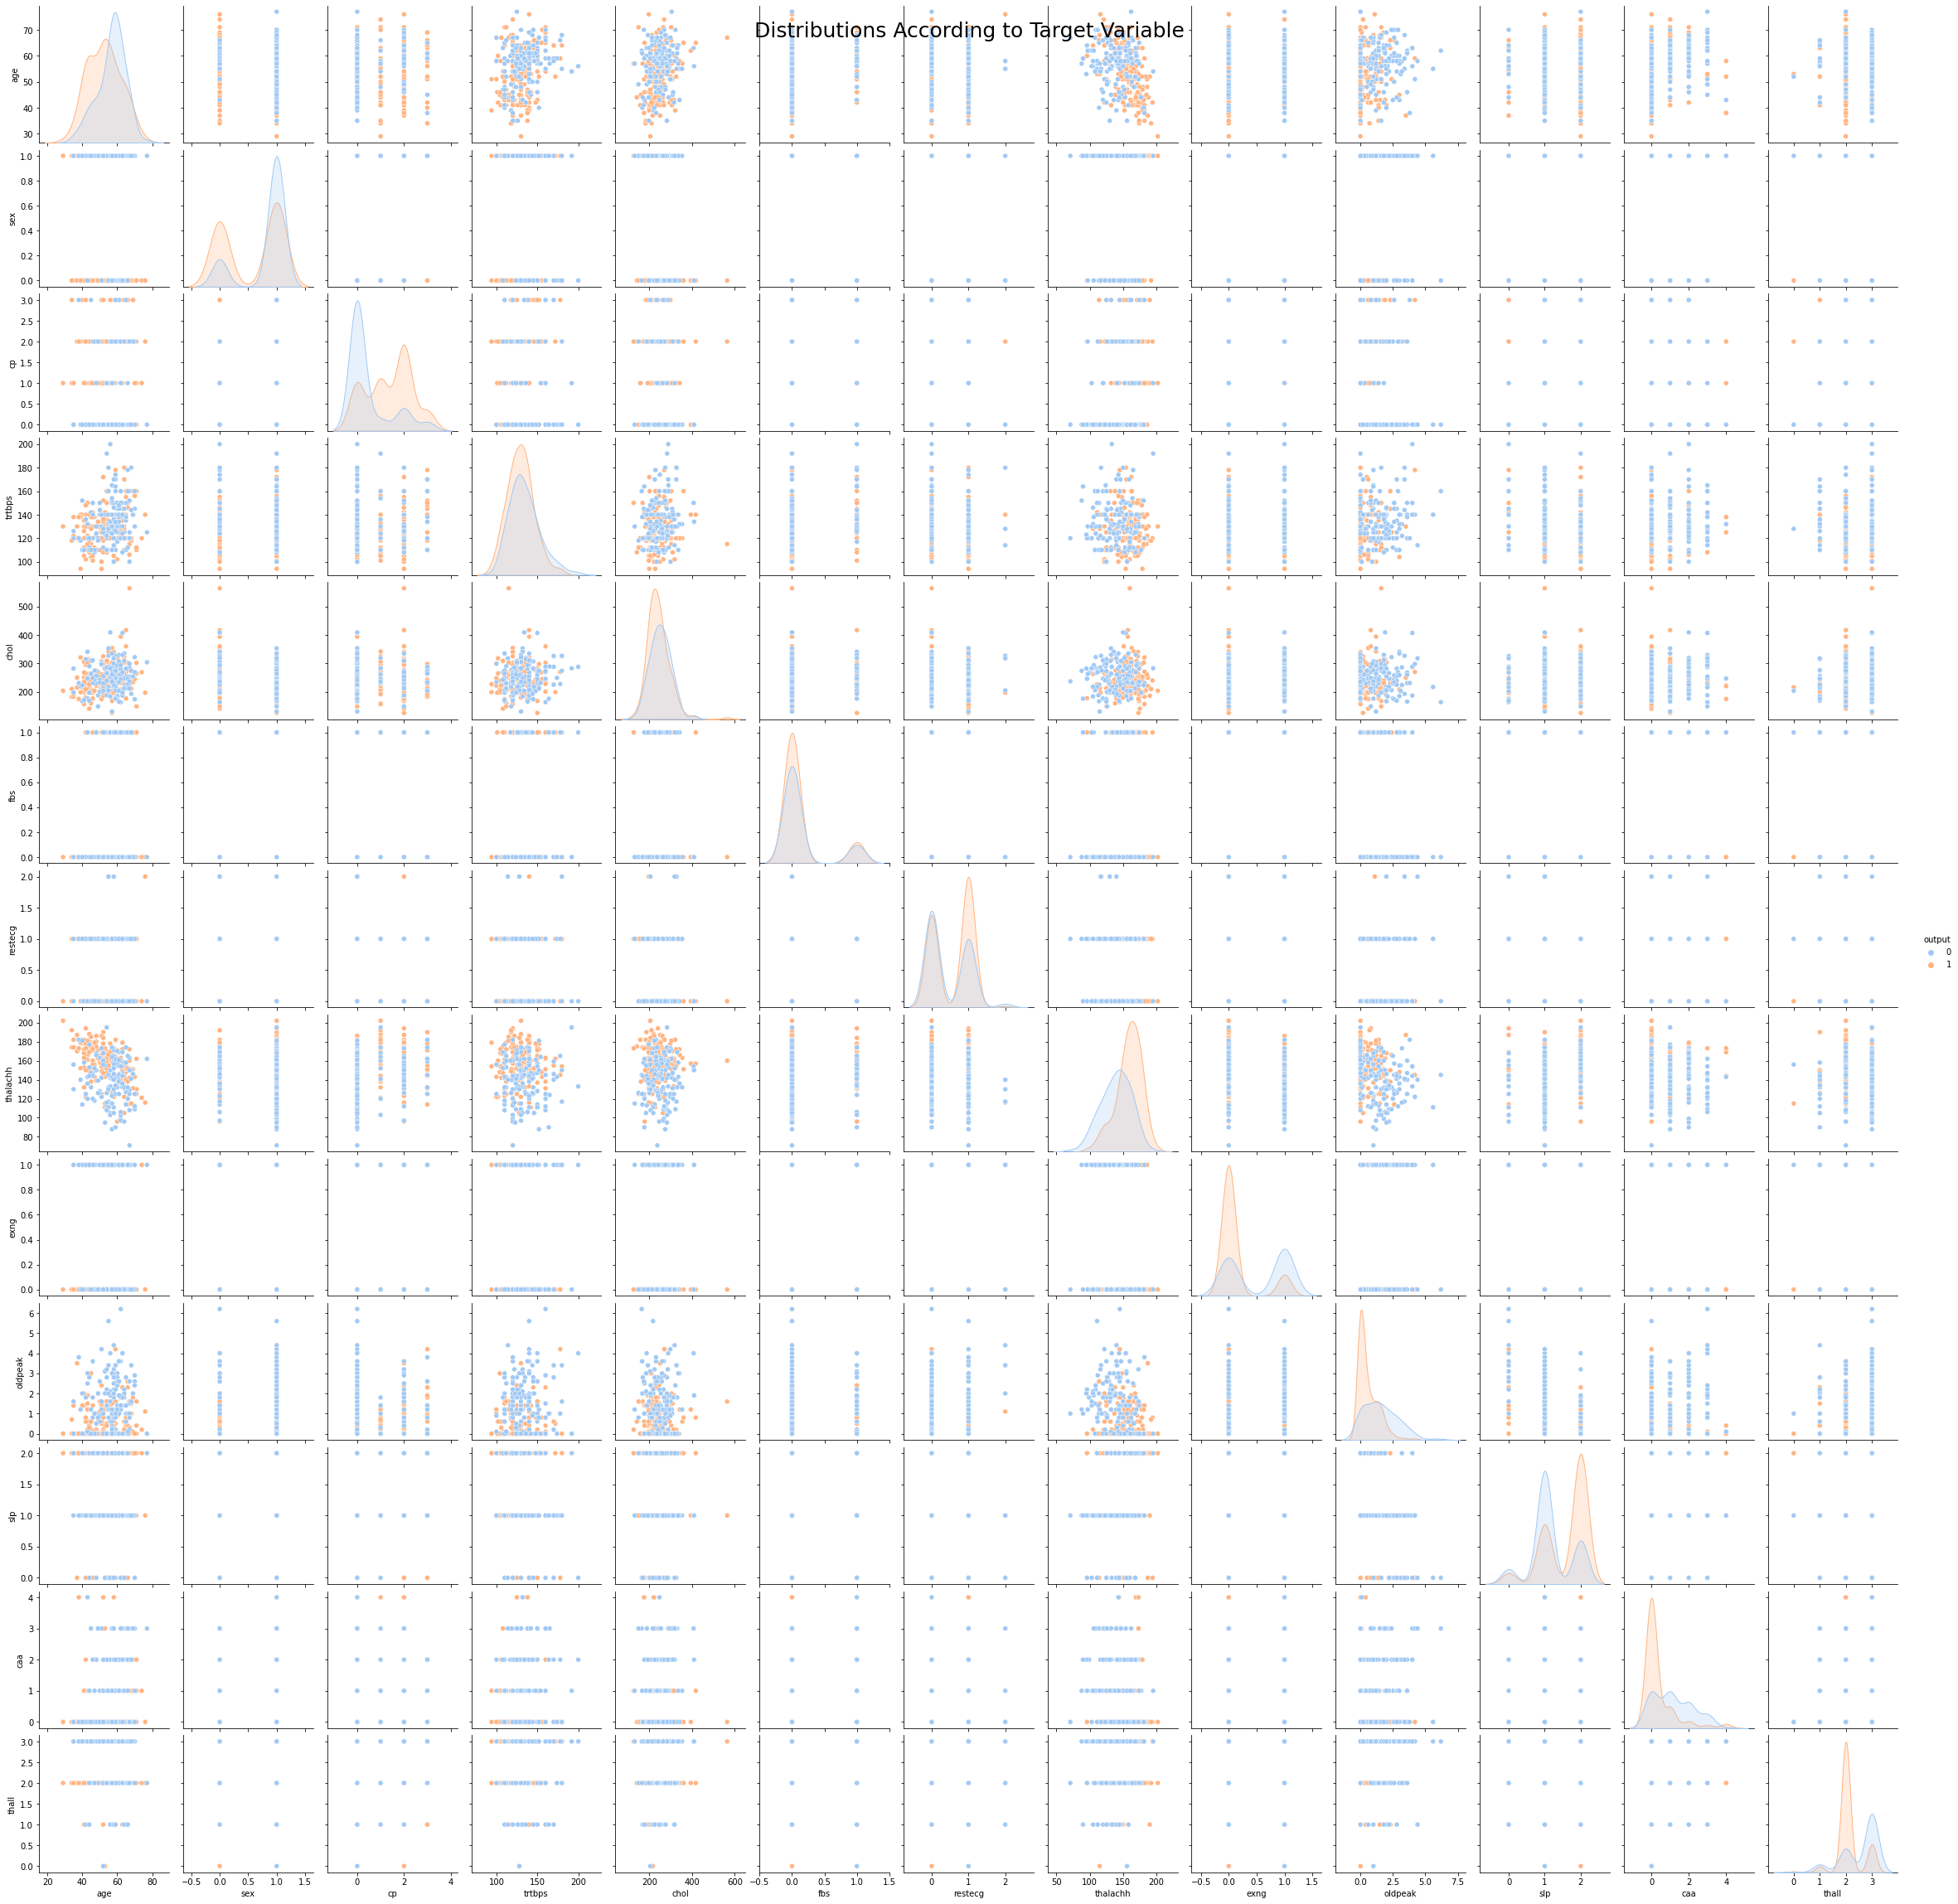

In [14]:
sns.pairplot(df, hue='output',palette = "pastel");
plt.suptitle('Distributions According to Target Variable',fontsize=25);

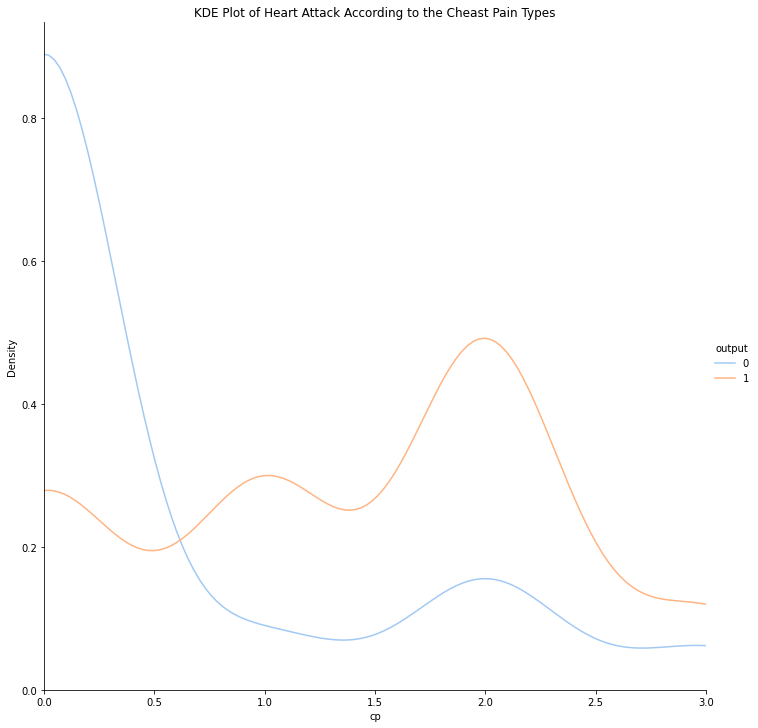

In [15]:
(sns
 .FacetGrid(df,
                    hue='output',
                    palette='pastel',
                    xlim=(0,3),
                    height=10)
 .map(sns.kdeplot, 'cp') 
 .add_legend()
 .set(title='KDE Plot of Heart Attack According to the Cheast Pain Types')
);

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

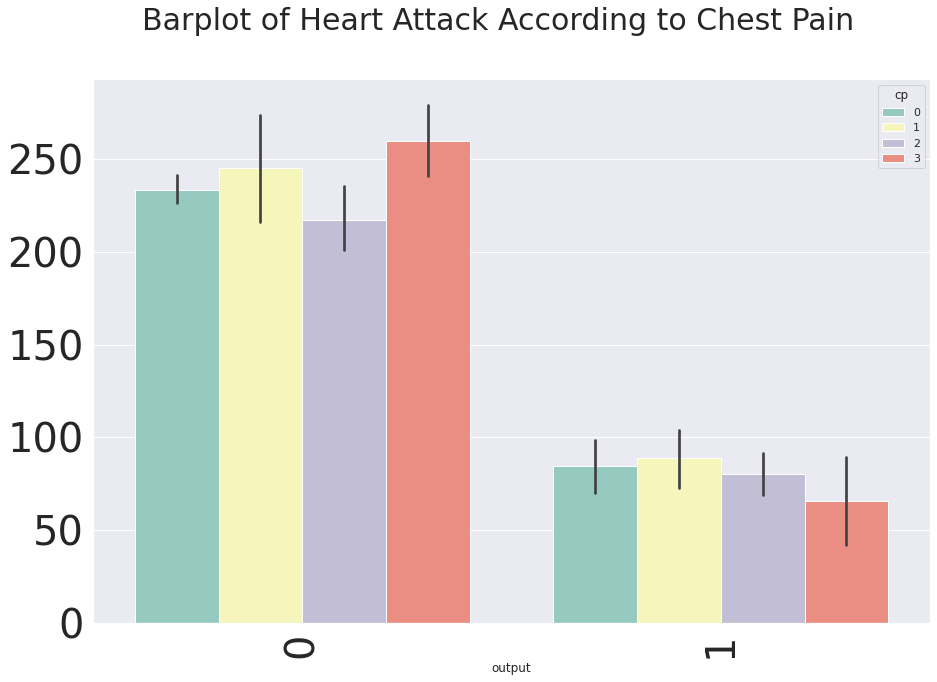

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
a=sns.barplot(data=df, x='output',y=df["output"].index,hue='cp',palette="Set3");
a.tick_params(axis='x',rotation=90); #x eksenindeki parametreyi 90 derece çevirdik
plt.suptitle('Barplot of Heart Attack According to Chest Pain',fontsize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

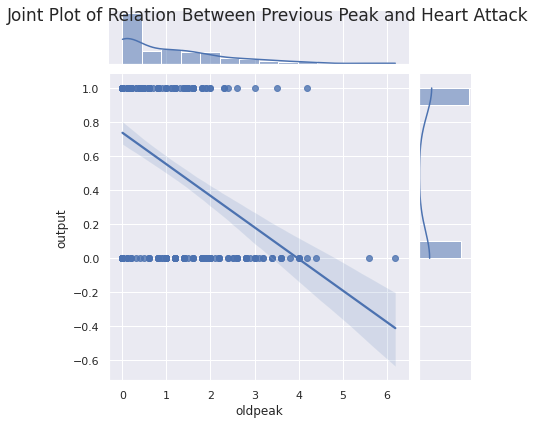

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.jointplot(x = "oldpeak", y = "output", data = df, kind = "reg", palette="Pastel2");
plt.suptitle('Joint Plot of Relation Between Previous Peak and Heart Attack',fontsize=17);

In [18]:
corr = df[con_data].corr()
corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

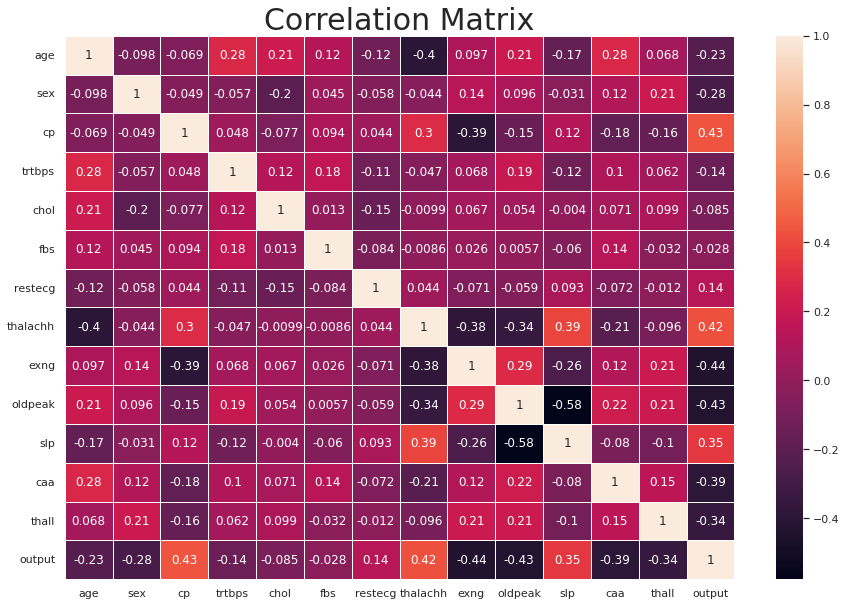

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, linewidths='.5', color='#4747b5')
plt.title('Correlation Matrix', fontsize=30)

# **Preprocessing the Data for Modeling**

In [20]:
#Split the features and the target
X = df.drop(['output'],axis=1)
y = df[['output']]

In [21]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

# **Splitting the Train and Test Data**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (242, 13)
Shape of X_test:  (61, 13)
Shape of y_train:  (242, 1)
Shape of y_test:  (61, 1)


# **Modeling**

# # **KNN**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=4)

In [25]:
#prediction
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [26]:
#accuracy evaluation->gerçek sonuç ile tahmin karşılaştırılır
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8760330578512396
Test set Accuracy:  0.8524590163934426


# # finding the k value which gives the best accuracy

In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1)) #k=1'den 10'a kadar 9 tane değer vardır
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    yhat=yhat.reshape(61,1)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

array([0.81967213, 0.81967213, 0.83606557, 0.85245902, 0.81967213,
       0.85245902, 0.83606557, 0.8852459 , 0.85245902])

In [28]:
print( "The best KNN accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best KNN accuracy was with 0.8852459016393442 with k= 8


In [29]:
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(yhat,y_test)
print("Confusion Matrix:\n",c_m)

Confusion Matrix:
 [[21  3]
 [ 6 31]]


In [30]:
#how can i calculate precision, recall and f1 score manually
TP=c_m[0,0]
FP=c_m[0,1]
FN=c_m[1,0]
TN=c_m[1,1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score=2*(precision*recall)/(precision+recall)
print("F1 Score:",f1_score)

F1 Score: 0.823529411764706


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def score(y_test,yhat):
    accuracy = accuracy_score(y_test, yhat)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat)
    print('F1 score: %f' % f1)
    matrix = confusion_matrix(y_test,yhat)
    print(matrix)


In [32]:
score(y_test,yhat)

Accuracy: 0.852459
Precision: 0.837838
Recall: 0.911765
F1 score: 0.873239
[[21  6]
 [ 3 31]]


# # **Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier

dectree  = DecisionTreeClassifier(criterion = "entropy")

In [34]:
dectree.fit(X_train,y_train)
dectree_pred = dectree.predict(X_test)

In [35]:
c_m = confusion_matrix(dectree_pred,y_test)
print("Confusion Matrix:\n",c_m)

Confusion Matrix:
 [[22  8]
 [ 5 26]]


In [36]:
print("Decision Tree Accuracy: ",dectree.score(X_test,y_test))

Decision Tree Accuracy:  0.7868852459016393


In [37]:
score(y_test,dectree_pred)

Accuracy: 0.786885
Precision: 0.838710
Recall: 0.764706
F1 score: 0.800000
[[22  5]
 [ 8 26]]


# # **Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, solver='liblinear')

In [39]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [40]:
from sklearn.metrics import confusion_matrix

c_m = confusion_matrix(yhat,y_test)
print("Logistic Regression\n",c_m)
print("Logistic Regression Accuracy: ",LR.score(X_test,y_test))

Logistic Regression
 [[21  4]
 [ 6 30]]
Logistic Regression Accuracy:  0.8360655737704918


In [41]:
score(y_test,yhat)

Accuracy: 0.836066
Precision: 0.833333
Recall: 0.882353
F1 score: 0.857143
[[21  6]
 [ 4 30]]


# # **Random Forest**

In [42]:
Kn=10
mean_ranfor = np.zeros((Kn-1))
ConfustionMx = []

In [43]:
for n in range(1,Kn):
    
    #Train Model and Predict  
    ranfor= RandomForestClassifier(n_estimators = n, criterion = "entropy").fit(X_train,y_train)
    ranfor_pred=ranfor.predict(X_test)
    mean_ranfor[n-1] = metrics.accuracy_score(y_test, ranfor_pred)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  af

In [44]:
mean_ranfor_list = pd.DataFrame(data=mean_ranfor, index = range(9))
mean_ranfor_list = mean_ranfor_list.values.tolist() # convert dataframe to list
max_ranfor = mean_ranfor_list.index(max(mean_ranfor_list))+1

In [45]:
ranfor1 = RandomForestClassifier(criterion = "entropy").fit(X_train,y_train)
ranfor1_pred = ranfor1.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [46]:
c_m = confusion_matrix(ranfor1_pred,y_test)
print("Confusion Matrix:\n",c_m)

Confusion Matrix:
 [[23  5]
 [ 4 29]]


In [47]:
print("Random Forest Accuracy:", ranfor1.score(X_test,y_test))

Random Forest Accuracy: 0.8524590163934426


In [48]:
score(y_test,ranfor1_pred)

Accuracy: 0.852459
Precision: 0.878788
Recall: 0.852941
F1 score: 0.865672
[[23  4]
 [ 5 29]]


# # **SVM (Support Vector Machine)**

The mathematical function used for the transformation is known as the kernel function. Kernel function has different types, these types being:

1. Linear
1. Polynomial
1. RBF
1. Sigmoid

In [49]:
from sklearn import svm

supvec = svm.SVC(kernel='rbf')
supvec.fit(X_train, y_train) 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [50]:
yhat = supvec.predict(X_test)
yhat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [51]:
c_m = confusion_matrix(yhat,y_test )
print("SVC:\n",c_m)

SVC:
 [[21  2]
 [ 6 32]]


# # **Naive Bayes**

In [52]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [53]:
yhat = gauss_nb.predict(X_test)

In [54]:
c_m = confusion_matrix(yhat,y_test)
print("Gaussian Naive Bayes:\n",c_m)

Gaussian Naive Bayes:
 [[21  3]
 [ 6 31]]


In [55]:
print("Gaussian Naive Bayes Accuracy: ",gauss_nb.score(X_test,y_test))

Gaussian Naive Bayes Accuracy:  0.8524590163934426


In [56]:
score(y_test,yhat)

Accuracy: 0.852459
Precision: 0.837838
Recall: 0.911765
F1 score: 0.873239
[[21  6]
 [ 3 31]]


# ***Accuracy Comparison***

In [57]:
print("KNN Accuracy: ", mean_acc.max())
print("Decision Tree Accuracy: ",dectree.score(X_test,y_test))
print("Logistic Regression Accuracy: ",LR.score(X_test,y_test))
print("Random Forest Accuracy:", ranfor1.score(X_test,y_test))
print("SVM Accuracy: ",supvec.score(X_test,y_test))
print("Gaussian Naive Bayes Accuracy: ",gauss_nb.score(X_test,y_test))

KNN Accuracy:  0.8852459016393442
Decision Tree Accuracy:  0.7868852459016393
Logistic Regression Accuracy:  0.8360655737704918
Random Forest Accuracy: 0.8524590163934426
SVM Accuracy:  0.8688524590163934
Gaussian Naive Bayes Accuracy:  0.8524590163934426


In [58]:
algos=["KNN","Decision Tree", "Logistic Regression", "Random Forest", "SVM", "Gaussian Naive Bayes"]
predictions=[mean_acc.max(), dectree.score(X_test,y_test), LR.score(X_test,y_test), ranfor1.score(X_test,y_test), supvec.score(X_test,y_test), gauss_nb.score(X_test,y_test)]

<AxesSubplot:>

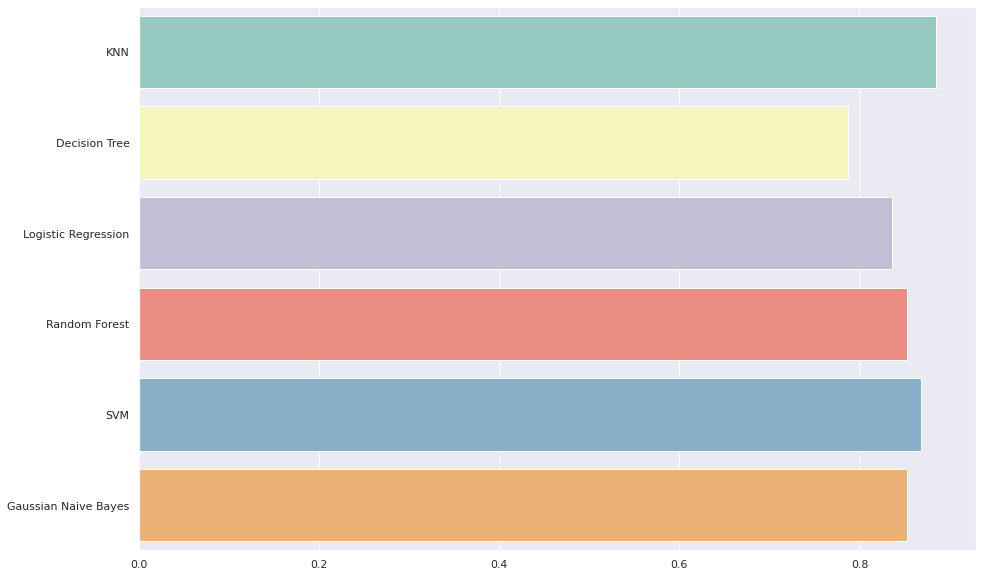

In [59]:
plt.figure(figsize = (15,10))
sns.barplot(x = predictions, y = algos, palette = 'Set3')